In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
############
# Insert your code here to create/fetch your segmentation image
# My code was set up in Blender to output a segmentation png like this:
# seg_path = output_path / 'Segmentation_1.png'
############

# Read in the image with OpenCV
im = cv2.imread('C:/Users/emili/OneDrive/Documentos/GitHub/MedSAM/seg_result2.png')
#reshape to 128 x 128
im = cv2.resize(im, (128, 128))
#convert to hsv
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
im=hsv[:,:,0]
#convert all diferent than 0 to 1
im[im!=0]=1
# Segmentation color value (in Blender this is likely your pass index)
seg_value = 1

if im is not None:
    np_seg = np.array(im)
    segmentation = np.where(np_seg == seg_value)

    # Bounding Box
    bbox = 0, 0, 0, 0
    if len(segmentation) != 0 and len(segmentation[1]) != 0 and len(segmentation[0]) != 0:
        x_min = int(np.min(segmentation[1]))
        x_max = int(np.max(segmentation[1]))
        y_min = int(np.min(segmentation[0]))
        y_max = int(np.max(segmentation[0]))

        bbox = x_min, y_min, x_max, y_max

        #########
        # Do what you need to do with the bbox, for example add it to your annotation file
        #########
else:
    # Handle error case where segmentation image cannot be read or is empty
    print("Error: Segmentation image could not be read or is empty.")

(128, 128)


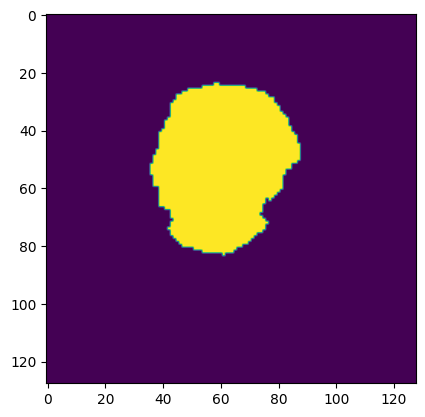

In [6]:
print(im.shape)
plt.imshow(im)

In [7]:
print(bbox)

(36, 87, 24, 83)
